In [1]:
## Heritablity
## - the amount of phenotypic variation explained by the genotypic state (allele) at a given loci. 
## WHAT IT IS NOT: the probablity of having a phenotype from one of the parental strains. 

In [2]:
import pandas as pd, numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
N = 20 ## sample size
## Make phenotypic data shown on slides 12 and 13 of Thursdays lecture
phenotypes = np.concatenate([np.ones(4),2*np.ones(6),3*np.ones(5),4*np.ones(5)])
phenotypes.shape[0] ## Print the number phenotypic samples

20

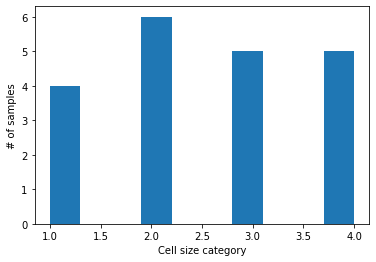

In [4]:
## Plot the data
plt.hist(phenotypes);
plt.ylabel('# of samples');
plt.xlabel('Cell size category');

In [5]:
## Make an array of the genotypic values as seen on slide 12 and 13
genotype = np.concatenate([np.zeros(10),np.ones(10)])
genotype.shape[0]

20

In [6]:
## Make and stores the phenotypes and genotyeps in a dataframe
celldf = pd.DataFrame([phenotypes,genotype]).T
celldf.columns = ['Phenotype','Genotype']
celldf.shape

(20, 2)

In [7]:
## View the first 5 rows of data
celldf.head()

,Phenotype,Genotype
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,2.0,0.0


In [8]:
## Bring in seaborn for plot
import seaborn as sns

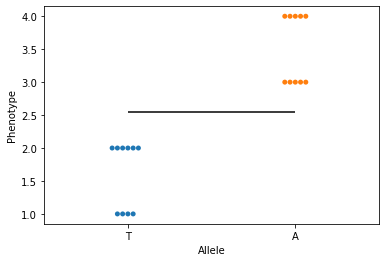

In [9]:
## Create a phenotype by genotype plot
sns.swarmplot(y='Phenotype',x='Genotype',data=celldf);
plt.xlabel('Allele');plt.xticks([0,1],['T','A']);
plt.hlines(celldf.Phenotype.mean(),0,1,color='k'); ## Plots the mean of the phenotypic values

In [10]:
## Sum squares mean
## Calculate the mean
mean = celldf.Phenotype.mean()
mean

2.55

In [11]:
## Calculate the sum of squares of the mean
ssm = np.sum((celldf.Phenotype - mean)**2)
ssm

22.949999999999996

In [12]:
## Use pandas to gather the average phenotype by genotype
celldf.groupby(['Genotype']).mean()

,Phenotype
Genotype,
0.0,1.6
1.0,3.5


In [13]:
## Calculate the sum of sqaures residuals with respect to the T allele (as seen on slide 12 and 13)
ssr_t = np.sum((celldf[(celldf.Genotype==0)
                      ].Phenotype.values - celldf[(celldf.Genotype==0)
                                                 ].Phenotype.mean())**2)

In [14]:
## Calculate the sum of sqaures residuals with respect to the A allele (as seen on slide 12 and 13)
ssr_a = np.sum((celldf[(celldf.Genotype==1)
                      ].Phenotype.values - celldf[(celldf.Genotype==1)
                                                 ].Phenotype.mean())**2)

In [15]:
## Sum these sum of squares residuals
ssr  =ssr_t +  ssr_a
ssr

4.9

In [16]:
## Calculate an R-squared values
R2 = (ssm - ssr)/ssm
R2 ## This value should vary between 0 and 1 ie 0 - 100%

0.7864923747276689

In [17]:
## Bring in modual for conducting OLS regression
import statsmodels.formula.api as smf

In [18]:
## HINT: 
## Be sure that the varialbes in your formula match the 
## Column names in your dataframe.
res = smf.ols(formula='Phenotype ~ Genotype',data=celldf).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Phenotype   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     66.31
Date:                Thu, 22 Oct 2020   Prob (F-statistic):           1.90e-07
Time:                        17:24:35   Log-Likelihood:                -14.314
No. Observations:                  20   AIC:                             32.63
Df Residuals:                      18   BIC:                             34.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6000      0.165      9.697      0.000       1.253       1.947
Genotype       1.9000      0.233      8.143      0.000       1.410       2.390
==============================================================================
Omnibus:                       36.525   Durbin-Watson:                   0.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.201
Skew:                          -0.198   Prob(JB):                        0.202
Kurtosis:                       1.080   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
## Gather the r-squared value from the OLS
res.rsquared

0.7864923747276689

## For more examples and explanation on linear regression
## be srue to check out STAT QUEST! on youtube:
## https://www.youtube.com/watch?v=nk2CQITm_eo